# COGS 108 - Determining The Connection Between Murder and Other Crimes 
 link to video: https://youtu.be/vtjtkC4qPw0

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

Our project aims to understand how different crime rates correlate with murder rates over cities in the United States. We have gathered the data from the FBI’s Uniform Crime Reporting Program, which displays the number of reportings for each crime. Since the data was originally untidy, we had to wrangle the data into multiple tidy datasets. Next, we created multiple line charts and bar charts to analyze the year by year data, and conducted an Ordinary Least Squares analysis test between murder and the different crime rates to determine the correlations. From our analysis, we gathered that some crimes do indeed have stronger correlations to murder rates than others. Aggravated assault and larceny theft have the highest correlations.

# Names

- Issac Navarro
- Kelly Nham
- Aryan Safari
- Albert Zhong

<a id='research_question'></a>
# Research Question

Do the different crimes (robbery, assault, property crime, etc.) reported by the FBI have a correlation with the reported murder rates? If so, which criminal activities affect it the most?

<a id='background'></a>

## Background & Prior Work

According to an article on fivethirtyeight from 2016[^Asher] that pulls from the crime statistics reported by the FBI, murder rates are on the rise, particularly in large cities. However, their analysis only included large cities with a population of 250k or more, and there was little in the way of why the murder rate increased. Furthermore, since the article was focused on murders in particular, there wasn't an analysis on the other crimes reported from the FBI. The natural question to that would then be, why is that the case? While there are some known correlations for higher rates of homicide, such as higher temperatures[^Ingraham], it is not as clear as to whether there are correlations between the rates of different crimes. For example, is there a stronger correlation between murder and armed robbery vs murder and larceny? Are there any with negative correlations? Does this change year by year? By using the full FBI dataset that includes all the reported crimes and all locations, and analyzing multiple consecutive years from 2015-2019, we hope to answer those questions. 

References (include links):
[^Asher]: Asher, Jeff. (6 Oct 2016). A Handful Of Cities Are Driving 2016's Rise in Murders. *FiveThirtyEight*. https://fivethirtyeight.com/features/a-handful-of-cities-are-driving-2016s-rise-in-murders/ 
[^Ingraham]: Ingraham, Christopher. (16 July 2019). Two New Studies Warn That A Hotter World Will Be A More Violent One. *The Washington Post*. https://www.washingtonpost.com/business/2019/07/16/two-new-studies-warn-that-hotter-world-will-be-more-violent-one/

# Hypothesis


We hypothesize that crimes that are considered violent, such as rape, robbery, and aggravated assault, will have a higher correlation with murder rates than other reported crimes. Since murder is also considered a violent crime, we expect there to be a better correlation between crimes considered violent (rape, robbery, aggravated assault, and murder). 

# Datasets

 - Dataset Name: Crime in the United States (2015)
 - Link to dataset: https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-6
 - Number of Observations: 561


 - Dataset Name: Crime in the United States (2016)
 - Link to dataset: https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-4
 - Number of Observations: 573


 - Dataset Name: Crime in the United States (2017)
 - Link to dataset: https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/topic-pages/tables/table-6
 - Number of Observations: 596


 - Dataset Name: Crime in the United States (2018)
 - Link to dataset: https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/topic-pages/tables/table-6
 - Number of Observations: 574


 - Dataset Name: Crime in the United States (2019)
 - Link to dataset: https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/tables/table-6
 - Number of Observations: 495

Dataset Description: The data consists of provided reports on crimes known to the police. The dataset includes the number of reports for different crimes (murder, rape, robbery, aggravated assault, property crime, burglary, larceny theft, and motor vehicle theft) per city in the United States, along with the city’s population.

All the datasets are the same but from different years, and therefore will have the same dataset description.

We combined these five datasets to look the crime rates over the course of five years (2015-2019). Having the data from 5 different years helps determine whether there is a correlation between murder rate and other crimes.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

The raw data requires a hefty amount of wrangling due to the fact that the raw data is incredibly untidy (as seen in the first cell below). For starters, the Metropolitan Statistical Area (MSA) is always listed on one line with the next few lines being NaNs since it was made for humans to see and understand that the NaNs were meant to still correspond to the previously listed MSA. To further throw a wrench in things, many of the lines following each MSA aren't even data, such as the line after each one that says which counties are included in the MSA. Next, the columns are basically all unnamed because the actual names for them are all in row 2 (and overall rows 0-2 are basically just gibberish). Furthermore, they list the murders for each city in the MSA, but only list the rate per 100k inhabitants for the whole MSA. Finally, there were many different crimes listed but the one we are focusing on are murder rates. Thus, to wrangle all the data for each year, I had to drop many of the columns and rows, so that it is only the murder rates per city and per 100k inhabitants in each MSA, as well as the population of each city and MSA. To finish up the wrangling, I split up each year into two datasets: one for each city's murders and one for each MSA's murder rate per 100k inhabitants.

In [2]:
untidyShowcase = pd.read_csv('https://raw.githubusercontent.com/azhong19/COGS108_Repo/main/2015.xls%20-%2015tbl06.csv')
untidyShowcase.iloc[0:15]

,Table 6,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Crime in the United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by Metropolitan Statistical Area, 2015",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Metropolitan Statistical Area,Counties/principal cities,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft
3,"Abilene, TX M.S.A.",NaN,"169,713",,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
4,NaN,"Includes Callahan, Jones, and Taylor Counties",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,City of Abilene,"121,764",613,7,84,128,394,"5,354","1,168","3,798",388
6,NaN,Total area actually reporting,100.0%,700,9,95,133,463,"6,125","1,446","4,232",447
7,NaN,"Rate per 100,000 inhabitants",NaN,412.5,5.3,56.0,78.4,272.8,"3,609.0",852.0,"2,493.6",263.4
8,"Akron, OH M.S.A.",NaN,"704,320",,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
9,NaN,Includes Portage and Summit Counties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#initial csv reading and wrangling (2015)
df2015 = pd.read_csv('https://raw.githubusercontent.com/azhong19/COGS108_Repo/main/2015.xls%20-%2015tbl06.csv')
df2015 = df2015.drop(df2015.columns[[3]], axis = 1)
df2015.columns = ['Area', 'City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft','Motor_Vehicle_Theft']
df2015 = df2015[(df2015['City'].str.contains("City of")) | (df2015['City'].str.contains("Rate per")) | (df2015['Area'].str.contains("M.S.A")) | (df2015['Area'].str.contains("M.D"))]
df2015 = df2015.reset_index(drop=True)

#creating a joined dataset for Metropolitan Statistical Area and Murders per 100k inhabitants
area2015 = df2015[['Area', 'Population']]
area2015 = area2015.dropna().reset_index(drop=True)
rate2015 = df2015[['City', 'Murders']]
rate2015 = rate2015[(rate2015['City'].str.contains("Rate per")) | (rate2015['City'].str.contains("Rate per"))] #for some reason I have to have the or statement here or it doesn't work, I know it looks incredibly jank but I couldn't think of a better way to do it
rate2015 = rate2015.reset_index(drop=True)
joined2015 = area2015.join(rate2015, lsuffix='Area', rsuffix='City')
joined2015 = joined2015.drop(joined2015.columns[[2]], axis = 1)
joined2015.columns = ['Area', 'Population', 'Rate (per 100k inhabitants)']

#creating a dataset for murders per city
city2015 = df2015[['City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft' ]]
city2015 = city2015[(city2015['City'].str.contains("City of")) | (city2015['City'].str.contains("City of"))] #again have to have the or statement here, this is gonna make me lose what little sanity I had left
city2015 = city2015.reset_index(drop=True)
city2015

,City,Population,Murders,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft
0,City of Abilene,"121,764",7,84,128,394,"5,354","1,168","3,798",388
1,City of Akron,"197,587",28,166,402,572,"8,027","2,426","5,002",599
2,City of Albany,"75,357",10,35,201,554,"3,902","1,137","2,616",149
3,City of Albany,"52,394",2,10,16,13,"1,726",173,"1,447",106
4,City of Albuquerque,"559,721",43,404,"1,686","3,273","33,993","5,996","22,818","5,179"
...,...,...,...,...,...,...,...,...,...,...
556,City of Yakima,"93,798",7,51,126,330,"5,091","1,307","3,110",674
557,City of York,"43,864",10,19,178,118,"1,399",336,939,124
558,City of Hanover,"15,494",0,3,6,15,453,27,419,7
559,City of Yuba City,"65,974",0,28,66,122,"1,792",429,"1,160",203


(The other years will have similar looking tables and thus we have left it out of this report. However, the charts can be seen in our EDA checkpoint if you would like to see them!)

In [4]:
#initial csv reading and wrangling (2016)
df2016 = pd.read_csv('https://raw.githubusercontent.com/azhong19/COGS108_Repo/main/2016.xls%20-%2016tbl04.csv')
df2016 = df2016.drop(df2016.columns[[3]], axis = 1)
df2016.columns = ['Area', 'City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft','Motor_Vehicle_Theft']
df2016 = df2016[(df2016['City'].str.contains("City of")) | (df2016['City'].str.contains("Rate per")) | (df2016['Area'].str.contains("M.S.A")) | (df2016['Area'].str.contains("M.D"))]
df2016 = df2016.reset_index(drop=True)

#creating a joined dataset for Metropolitan Statistical Area and Murders per 100k inhabitants
area2016 = df2016[['Area', 'Population']]
area2016 = area2016.dropna().reset_index(drop=True)
rate2016 = df2016[['City', 'Murders']]
rate2016 = rate2016[(rate2016['City'].str.contains("Rate per")) | (rate2016['City'].str.contains("Rate per"))] #for some reason I have to have the or statement here or it doesn't work, I know it looks incredibly jank but I couldn't think of a better way to do it
rate2016 = rate2016.reset_index(drop=True)
joined2016 = area2016.join(rate2016, lsuffix='Area', rsuffix='City')
joined2016 = joined2016.drop(joined2016.columns[[2]], axis = 1)
joined2016.columns = ['Area', 'Population', 'Rate (per 100k inhabitants)']

#creating a dataset for murders per city
city2016 = df2016[['City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft' ]]
city2016 = city2016[(city2016['City'].str.contains("City of")) | (city2016['City'].str.contains("City of"))] #again have to have the or statement here, this is gonna make me lose what little sanity I had left
city2016 = city2016.reset_index(drop=True)
#city2016

In [5]:
#initial csv reading and wrangling (2017)
df2017 = pd.read_csv('https://raw.githubusercontent.com/azhong19/COGS108_Repo/main/2017%20crime.csv')
df2017 = df2017.drop(df2017.columns[[3]], axis = 1)
df2017.columns = ['Area', 'City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft','Motor_Vehicle_Theft']
df2017 = df2017[(df2017['City'].str.contains("City of")) | (df2017['City'].str.contains("Rate per")) | (df2017['Area'].str.contains("M.S.A")) | (df2017['Area'].str.contains("M.D"))]
df2017 = df2017.reset_index(drop=True)

#creating a joined dataset for Metropolitan Statistical Area and Murders per 100k inhabitants
area2017 = df2017[['Area', 'Population']]
area2017 = area2017.dropna().reset_index(drop=True)
rate2017 = df2017[['City', 'Murders']]
rate2017 = rate2017[(rate2017['City'].str.contains("Rate per")) | (rate2017['City'].str.contains("Rate per"))] #for some reason I have to have the or statement here or it doesn't work, I know it looks incredibly jank but I couldn't think of a better way to do it
rate2017 = rate2017.reset_index(drop=True)
joined2017 = area2017.join(rate2017, lsuffix='Area', rsuffix='City')
joined2017 = joined2017.drop(joined2017.columns[[2]], axis = 1)
joined2017.columns = ['Area', 'Population', 'Rate (per 100k inhabitants)']

#creating a dataset for murders per city
city2017 = df2017[['City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft' ]]
city2017 = city2017[(city2017['City'].str.contains("City of")) | (city2017['City'].str.contains("City of"))] #again have to have the or statement here, this is gonna make me lose what little sanity I had left
city2017 = city2017.reset_index(drop=True)
#city2017

In [6]:
#initial csv reading and wrangling (2018)
df2018 = pd.read_csv('https://raw.githubusercontent.com/azhong19/COGS108_Repo/main/2018.xls%20-%2018tbl06.csv')
df2018 = df2018.drop(df2018.columns[[3]], axis = 1)
df2018.columns = ['Area', 'City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft','Motor_Vehicle_Theft']
df2018 = df2018[(df2018['City'].str.contains("City of")) | (df2018['City'].str.contains("Rate per")) | (df2018['Area'].str.contains("M.S.A")) | (df2018['Area'].str.contains("M.D"))]
df2018 = df2018.reset_index(drop=True)

#creating a joined dataset for Metropolitan Statistical Area and Murders per 100k inhabitants
area2018 = df2018[['Area', 'Population']]
area2018 = area2018.dropna().reset_index(drop=True)
rate2018 = df2018[['City', 'Murders']]
rate2018 = rate2018[(rate2018['City'].str.contains("Rate per")) | (rate2018['City'].str.contains("Rate per"))] #for some reason I have to have the or statement here or it doesn't work, I know it looks incredibly jank but I couldn't think of a better way to do it
rate2018 = rate2018.reset_index(drop=True)
joined2018 = area2018.join(rate2018, lsuffix='Area', rsuffix='City')
joined2018 = joined2018.drop(joined2018.columns[[2]], axis = 1)
joined2018.columns = ['Area', 'Population', 'Rate (per 100k inhabitants)']

#creating a dataset for murders per city
city2018 = df2018[['City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft' ]]
city2018 = city2018[(city2018['City'].str.contains("City of")) | (city2018['City'].str.contains("City of"))] #again have to have the or statement here, this is gonna make me lose what little sanity I had left
city2018 = city2018.reset_index(drop=True)
#city2018

In [7]:
#initial csv reading and wrangling (2019)
df2019 = pd.read_csv('https://raw.githubusercontent.com/azhong19/COGS108_Repo/main/2019.xls%20-%2019tbl06.csv')
df2019 = df2019.drop(df2019.columns[[3]], axis = 1)
df2019.columns = ['Area', 'City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft','Motor_Vehicle_Theft']
df2019 = df2019[(df2019['City'].str.contains("City of")) | (df2019['City'].str.contains("Rate per")) | (df2019['Area'].str.contains("M.S.A")) | (df2019['Area'].str.contains("M.D"))]
df2019 = df2019.reset_index(drop=True)

#creating a joined dataset for Metropolitan Statistical Area and Murders per 100k inhabitants
area2019 = df2019[['Area', 'Population']]
area2019 = area2019.dropna().reset_index(drop=True)
rate2019 = df2019[['City', 'Murders']]
rate2019 = rate2019[(rate2019['City'].str.contains("Rate per")) | (rate2019['City'].str.contains("Rate per"))] #for some reason I have to have the or statement here or it doesn't work, I know it looks incredibly jank but I couldn't think of a better way to do it
rate2019 = rate2019.reset_index(drop=True)
joined2019 = area2019.join(rate2018, lsuffix='Area', rsuffix='City')
joined2019 = joined2019.drop(joined2019.columns[[2]], axis = 1)
joined2019.columns = ['Area', 'Population', 'Rate (per 100k inhabitants)']

#creating a dataset for murders per city
city2019 = df2019[['City', 'Population', 'Murders', 'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft' ]]
city2019 = city2019[(city2019['City'].str.contains("City of")) | (city2019['City'].str.contains("City of"))] #again have to have the or statement here, this is gonna make me lose what little sanity I had left
city2019 = city2019.reset_index(drop=True)
#city2019

Now that the data is all wrangled we can finally clean the data. The main things that need to be done are removing the random numbers in the city/MSA names as well as changing the population be an int instead of an object.

In [8]:
#removes all numbers
def standardize_city_MSA_names(string):
    
    string = string.strip()
    string = string.replace("1", "")
    string = string.replace("2", "")
    string = string.replace("3", "")
    string = string.replace("4", "")
    string = string.replace("5", "")
    string = string.replace("6", "")
    string = string.replace("7", "")
    string = string.replace("8", "")
    string = string.replace("9", "")
    string = string.replace("0", "")
    string = string.replace(",", "")
    string = string.strip()
    
    return string

joined2015['Area'] = joined2015['Area'].apply(standardize_city_MSA_names)
city2015['City'] = city2015['City'].apply(standardize_city_MSA_names)

joined2016['Area'] = joined2016['Area'].apply(standardize_city_MSA_names)
city2016['City'] = city2016['City'].apply(standardize_city_MSA_names)

joined2017['Area'] = joined2017['Area'].apply(standardize_city_MSA_names)
city2017['City'] = city2017['City'].apply(standardize_city_MSA_names)

joined2018['Area'] = joined2018['Area'].apply(standardize_city_MSA_names)
city2018['City'] = city2018['City'].apply(standardize_city_MSA_names)

joined2019['Area'] = joined2019['Area'].apply(standardize_city_MSA_names)
city2019['City'] = city2019['City'].apply(standardize_city_MSA_names)
city2015

,City,Population,Murders,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft
0,City of Abilene,"121,764",7,84,128,394,"5,354","1,168","3,798",388
1,City of Akron,"197,587",28,166,402,572,"8,027","2,426","5,002",599
2,City of Albany,"75,357",10,35,201,554,"3,902","1,137","2,616",149
3,City of Albany,"52,394",2,10,16,13,"1,726",173,"1,447",106
4,City of Albuquerque,"559,721",43,404,"1,686","3,273","33,993","5,996","22,818","5,179"
...,...,...,...,...,...,...,...,...,...,...
556,City of Yakima,"93,798",7,51,126,330,"5,091","1,307","3,110",674
557,City of York,"43,864",10,19,178,118,"1,399",336,939,124
558,City of Hanover,"15,494",0,3,6,15,453,27,419,7
559,City of Yuba City,"65,974",0,28,66,122,"1,792",429,"1,160",203


In [9]:
#converts population into an int
def standardize_numbers(arr):
    string = ''
    output = []
    for i in arr:
        string = i
        if isinstance(string, str):
            string = string.strip()
            string = string.replace(",", "")
            string = string.strip()
            string = int(string)
            output.append(string)
        elif(pd.isnull(string)):
            output.append(string)
        else:
            string = int(string)
            output.append(string)
    
    return output

city2015.iloc[:,1:] = city2015.iloc[:,1:].apply(standardize_numbers)
city2016.iloc[:,1:] = city2016.iloc[:,1:].apply(standardize_numbers)
city2017.iloc[:,1:] = city2017.iloc[:,1:].apply(standardize_numbers)
city2018.iloc[:,1:] = city2018.iloc[:,1:].apply(standardize_numbers)
city2019.iloc[:,1:] = city2019.iloc[:,1:].apply(standardize_numbers)

Next, to better analyze year by year trends we need to combine all of yearly datasets into one big one for both the cities and the MSAs.

In [10]:
#combines all the murders per city dataframes into one
citycombine = city2015.join(city2016, lsuffix = ' 2015', rsuffix = ' 2016').join(city2017).join(city2018, lsuffix = ' 2017', rsuffix = ' 2018').join(city2019)
#citycombine = citycombine.drop(citycombine.columns[[3, 6, 9, 12]], axis = 1)
citycombine = citycombine.rename(columns={"City 2015": "City", "Population": "Population 2019", "Murders": "Murders 2019",'Rape':'Rape 2019', 'Robbery':'Robbery 2019', 'Aggravated_Assault': 'Aggravated_Assault 2019', 'Property_Crime':  'Property_Crime 2019', 'Burglary': 'Burglary 2019', 'Larceny_Theft': 'Larceny_Theft 2019', 'Motor_Vehicle_Theft': 'Motor_Vehicle_Theft 2019'})
citycombine = citycombine.dropna()
#df.drop("City", axis=1, inplace=True)
citycombine.drop("City 2016", axis=1, inplace=True)
citycombine.drop("City 2017", axis=1, inplace=True)
citycombine.drop("City 2018", axis=1, inplace=True)
citycombine = citycombine.loc[:,~citycombine.columns.duplicated()]

#citycombine.drop("City 2019", axis=1, inplace=True)


In [11]:
#combines all the datasets with Metropolitan Statistical Area and Murders per 100k inhabitants into one
joinedcombine = joined2015.join(joined2016, lsuffix = ' 2015', rsuffix = ' 2016').join(joined2017).join(joined2018, lsuffix = ' 2017', rsuffix = ' 2018').join(joined2019)
joinedcombine = joinedcombine.drop(joinedcombine.columns[[3, 6, 9, 12]], axis = 1)
joinedcombine = joinedcombine.rename(columns={"Area 2015": "Area", "Population": "Population 2019", "Rate (per 100k inhabitants)": "Rate (per 100k inhabitants) 2019"})
joinedcombine

,Area,Population 2015,Rate (per 100k inhabitants) 2015,Population 2016,Rate (per 100k inhabitants) 2016,Population 2017,Rate (per 100k inhabitants) 2017,Population 2018,Rate (per 100k inhabitants) 2018,Population 2019,Rate (per 100k inhabitants) 2019
0,Abilene TX M.S.A.,"169,713",5.3,"169,885",6.5,"170,995",4.1,"170,417",5.3,"171,125",5.3
1,Akron OH M.S.A.,"704,320",5.1,"703,561",6.0,"703,907",7.4,"704,283",6.4,"703,784",6.4
2,Albany GA M.S.A.,"154,516",7.8,"152,566",11.8,"151,534",15.2,"147,142",11.6,"149,257",11.6
3,Albany OR M.S.A.,"120,716",2.5,"122,030",0.0,"124,014",1.6,"871,741",2.2,"128,105",2.2
4,Albuquerque NM M.S.A.,"905,803",6.1,"878,166",2.0,"885,673",2.0,"915,468",9.5,"879,862",9.5
...,...,...,...,...,...,...,...,...,...,...,...
373,Guayama Puerto Rico M.S.A.,"79,086",11.4,"282,695",6.0,"135,895",2.9,NaN,NaN,NaN,NaN
374,Mayaguez Puerto Rico M.S.A.,"95,988",11.5,"134,144",5.2,"118,293",3.4,NaN,NaN,NaN,NaN
375,Ponce Puerto Rico M.S.A.,"317,185",18.0,"861,261",1.4,"119,117",1.7,NaN,NaN,NaN,NaN
376,San German Puerto Rico M.S.A.,"130,228",5.4,"250,717",8.4,"141,891",3.5,NaN,NaN,NaN,NaN


Finally, we created one final dataframe of just the murders and rates to facilitate an analysis of that as well.

In [12]:
#sets up dataframe to create lineplot

years = ['2015', '2016', '2017', '2018', '2019']
rates_df = joinedcombine[['Area','Rate (per 100k inhabitants) 2015', 'Rate (per 100k inhabitants) 2016', 'Rate (per 100k inhabitants) 2017', 'Rate (per 100k inhabitants) 2018', 'Rate (per 100k inhabitants) 2019']]
rates_df2 = rates_df.dropna().reset_index(drop=True)
rates_df2 = rates_df2.rename (columns = {'Rate (per 100k inhabitants) 2015': 'Rate 2015', 'Rate (per 100k inhabitants) 2016': 'Rate 2016', 'Rate (per 100k inhabitants) 2017': 'Rate 2017', 'Rate (per 100k inhabitants) 2018': 'Rate 2018', 'Rate (per 100k inhabitants) 2019': 'Rate 2019'})
rates_df2 = rates_df2.set_index('Area')
rates_df3 = rates_df2.transpose()
rates_df3 = rates_df3.apply(pd.to_numeric)
rates_df3['Years'] = years
rates_df3

Area,Abilene TX M.S.A.,Akron OH M.S.A.,Albany GA M.S.A.,Albany OR M.S.A.,Albuquerque NM M.S.A.,Alexandria LA M.S.A.,Altoona PA M.S.A.,Amarillo TX M.S.A.,Ames IA M.S.A.,Anchorage AK M.S.A.,...,Spokane-Spokane Valley WA M.S.A.,Springfield IL M.S.A.,Springfield MA M.S.A.,Springfield MO M.S.A.,Springfield OH M.S.A.,State College PA M.S.A.,Staunton-Waynesboro VA M.S.A.,St. Cloud MN M.S.A.,St. George UT M.S.A.,Years
Rate 2015,5.3,5.1,7.8,2.5,6.1,4.5,0.8,3.4,1.0,8.2,...,3.8,5.2,3.5,3.3,8.8,1.3,3.3,2.1,0.0,2015
Rate 2016,6.5,6.0,11.8,0.0,2.0,8.3,7.8,2.6,0.8,5.3,...,7.0,1.7,4.0,11.7,4.0,1.8,3.9,5.0,2.9,2016
Rate 2017,4.1,7.4,15.2,1.6,2.0,8.9,13.6,3.1,0.0,6.4,...,9.7,4.0,3.0,3.0,2.7,1.9,6.9,1.7,4.6,2017
Rate 2018,5.3,6.4,11.6,2.2,9.5,10.5,1.9,2.4,4.9,8.4,...,1.8,7.1,12.9,6.9,7.1,4.7,7.0,3.8,3.3,2018
Rate 2019,5.3,6.4,11.6,2.2,9.5,10.5,1.9,2.4,4.9,8.4,...,1.8,7.1,12.9,6.9,7.1,4.7,7.0,3.8,3.3,2019


# Data Analysis & Results

To begin our EDA, we'll start out by making a few line plots that plot the change in murder rate per 100k inhabitants in select Metropolitan Statistical Areas. These line plots will plot 10 essentially random MSAs each in order to get a wide range of MSAs being sampled with minimal confounds. From there, we'll be able to easily see whether or not there is a wide trend in murder rates for these MSAs (ie do some typically trend upwards while some trend downwards?).

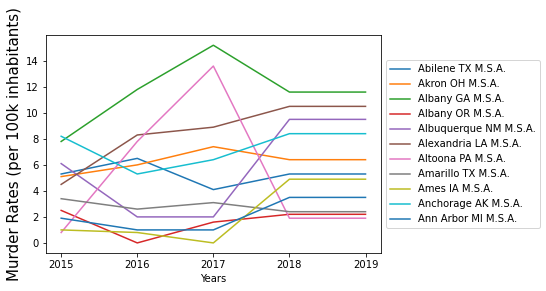

In [64]:
#lineplot showing the change in murder rates over 5 years in select MSAs

counter = 0
for items in rates_df3:
    if counter <= 10: 
        x = sns.lineplot(data = rates_df3, y = rates_df3.iloc[:,counter], x = 'Years',label=rates_df3.columns[counter])
        counter += 1
        
x.set_xlabel("Years", fontsize = 10)
x.set_ylabel("Murder Rates (per 100k inhabitants)", fontsize = 15)
x.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


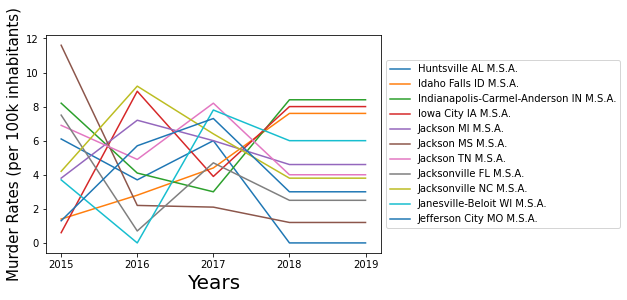

In [15]:
counter = 150
for items in rates_df3:
    if counter <= 160: 
        x = sns.lineplot(data = rates_df3, y = rates_df3.iloc[:,counter], x = 'Years',label=rates_df3.columns[counter])
        counter += 1
        
x.set_xlabel("Years", fontsize = 20)
x.set_ylabel("Murder Rates (per 100k inhabitants)", fontsize = 15)
x.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

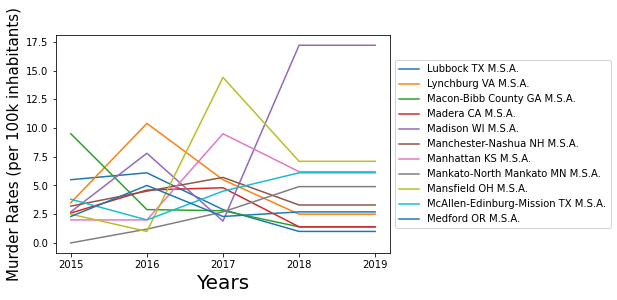

In [16]:
#lineplot showing the change in murder rates over 5 years in select MSAs

counter = 200
for items in rates_df3:
    if counter <= 210: 
        x = sns.lineplot(data = rates_df3, y = rates_df3.iloc[:,counter], x = 'Years',label=rates_df3.columns[counter])
        counter += 1

x.set_xlabel("Years", fontsize = 20)
x.set_ylabel("Murder Rates (per 100k inhabitants)", fontsize = 15)
x.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

There is generally no commonality between murder rate changes over the years in different MSAs. Some MSAs rate decreases and then increase and some increase and then decrease. Though, the rates stayed the same between the years 2018 and 2019. Since there doesn't appear to be any real trends at a glance when looking at the MSAs, it would be harder to tell if the other crimes follow suit. Therefore, if that path is a dead end, we can instead check the overall yearly trends

6408
6938.0
7343.0
6502.0
5289.0


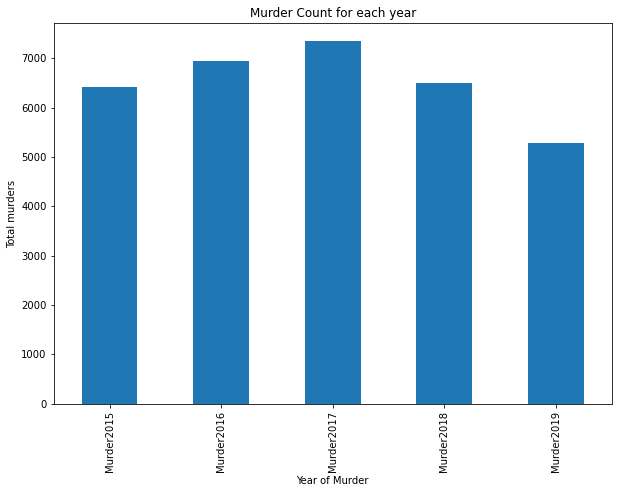

In [17]:
Murder2015 = citycombine['Murders 2015'].sum()
print(Murder2015)
Murder2016 = citycombine['Murders 2016'].sum()
print(Murder2016)
Murder2017 = citycombine['Murders 2017'].sum()
print(Murder2017)
Murder2018 = citycombine['Murders 2018'].sum()
print(Murder2018)
Murder2019 = citycombine['Murders 2019'].sum()
print(Murder2019)

total_murder_dict = {'Murder2015':Murder2015, 'Murder2016':Murder2016,'Murder2017':Murder2017,'Murder2018':Murder2018,'Murder2019':Murder2019}
total_murder_series = pd.Series(data=total_murder_dict)
total_murder_series.plot.bar(figsize = (10,7))

plt.title('Murder Count for each year')
plt.xlabel('Year of Murder')
plt.ylabel('Total murders')

plt.show()

We see that murder rates are the highest during 2017, and it is at its lowest in 2019, Lets see the criminal activity during both of these times. However, since some criminal acts are more common than others, it would be valuable to see a percentage increase on criminal activity rather than just the numbers.

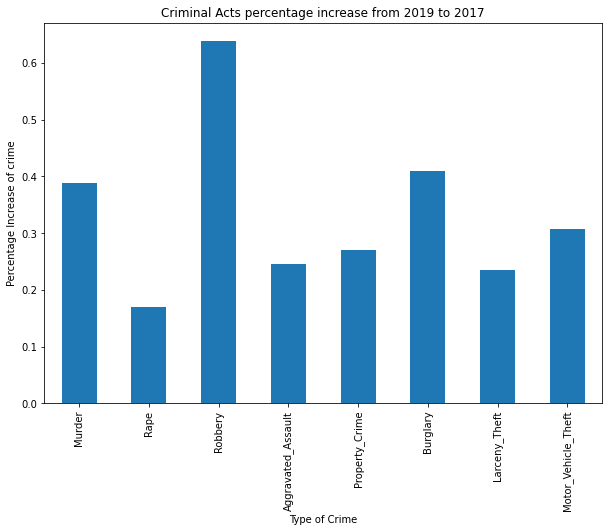

In [18]:
criminal_acts2017 = []
for column in citycombine[['Rape 2017', 'Robbery 2017','Aggravated_Assault 2017', 'Property_Crime 2017', 'Burglary 2017','Larceny_Theft 2017', 'Motor_Vehicle_Theft 2017']]:
    criminal_acts2017.append(citycombine[column].sum())
    
#CA_ser2017 = pd.Series(data=criminal_acts2017, index=['Rape 2017', 'Robbery 2017','Aggravated_Assault 2017', 'Property_Crime 2017', 'Burglary 2017','Larceny_Theft 2017', 'Motor_Vehicle_Theft 2017'])

criminal_acts2019 = []
for column in citycombine[['Rape 2019', 'Robbery 2019','Aggravated_Assault 2019', 'Property_Crime 2019', 'Burglary 2019','Larceny_Theft 2019', 'Motor_Vehicle_Theft 2019']]:
    criminal_acts2019.append(citycombine[column].sum())
    
#CA_ser2017 = pd.Series(data=criminal_acts2017, index=['Rape 2017', 'Robbery 2017','Aggravated_Assault 2017', 'Property_Crime 2017', 'Burglary 2017','Larceny_Theft 2017', 'Motor_Vehicle_Theft 2017'])
Murder2017_2019df = pd.DataFrame({'2017':criminal_acts2017,
                                '2019':criminal_acts2019},index=['Rape', 'Robbery','Aggravated_Assault', 'Property_Crime', 'Burglary','Larceny_Theft', 'Motor_Vehicle_Theft'])

percent_inc2017_2019 = []
percent_inc2017_2019.append(Murder2017/Murder2019-1)
for i in Murder2017_2019df.index:
    percent_inc2017_2019.append(Murder2017_2019df.loc[i,'2017']/Murder2017_2019df.loc[i,'2019'] -1)
percent_inc2017_2019_ser = pd.Series(data = percent_inc2017_2019, index = ['Murder','Rape', 'Robbery','Aggravated_Assault', 'Property_Crime', 'Burglary','Larceny_Theft', 'Motor_Vehicle_Theft'])

percent_inc2017_2019_ser.plot.bar(figsize = (10,7))

plt.title('Criminal Acts percentage increase from 2019 to 2017')
plt.xlabel('Type of Crime')
plt.ylabel('Percentage Increase of crime')

plt.show()

In this graph, we can see that the Burglary rate increased the same amount as the murder rates did, lets see if this is true for 2015-2019 with a lineplot. First we will make a dataframe with all the totals for each crime for each year.

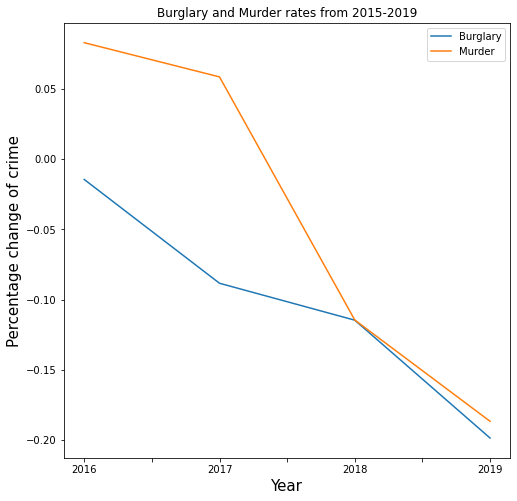

In [19]:
total_robbery_arr = []
Robbery2015 = citycombine['Robbery 2015'].sum()
total_robbery_arr.append(Robbery2015)
#print(Robbery2015)
Robbery2016 = citycombine['Robbery 2016'].sum()
total_robbery_arr.append(Robbery2016)
#print(Robbery2016)
Robbery2017 = citycombine['Robbery 2017'].sum()
total_robbery_arr.append(Robbery2017)
#print(Robbery2017)
Robbery2018 = citycombine['Robbery 2018'].sum()
total_robbery_arr.append(Robbery2018)
#print(Robbery2018)
Robbery2019 = citycombine['Robbery 2019'].sum()
total_robbery_arr.append(Robbery2019)
#print(Robbery2019)

total_robbery_series = pd.Series(data=total_robbery_arr, index= ['Robbery2015','Robbery2016','Robbery2017','Robbery2018','Robbery2019'])
rape_arr = citycombine[['Rape 2015','Rape 2016','Rape 2017','Rape 2018','Rape 2019']].sum().tolist()
assault_arr = citycombine[['Aggravated_Assault 2015','Aggravated_Assault 2016','Aggravated_Assault 2017','Aggravated_Assault 2018','Aggravated_Assault 2019']].sum().tolist()
property_Crime_arr = citycombine[['Property_Crime 2015','Property_Crime 2016','Property_Crime 2017','Property_Crime 2018','Property_Crime 2019']].sum().tolist()
burglary_arr = citycombine[['Burglary 2015','Burglary 2016','Burglary 2017','Burglary 2018','Burglary 2019']].sum().tolist()
larceny_Theft_arr = citycombine[['Larceny_Theft 2015','Larceny_Theft 2016','Larceny_Theft 2017','Larceny_Theft 2018','Larceny_Theft 2019']].sum().tolist()
motor_Vehicle_Theft_arr = citycombine[['Motor_Vehicle_Theft 2015','Motor_Vehicle_Theft 2016','Motor_Vehicle_Theft 2017','Motor_Vehicle_Theft 2018','Motor_Vehicle_Theft 2019']].sum().tolist()

Total_Crimes_df = pd.DataFrame({'Murder':list(total_murder_dict.values()),
                                'Rape': rape_arr,
                                'Aggravated Assault' : assault_arr,
                                'Burglary': burglary_arr,
                                'Larceny_Theft' : larceny_Theft_arr,
                                'Motor_Vehicle_Theft' : motor_Vehicle_Theft_arr,
                                'Robbery':total_robbery_arr},
                                index=['2015','2016','2017','2018','2019'])

#Total_Crimes_df.plot.line(subplots=True,figsize = (10,16))
#plt.figure(figsize = (10,1))
Total_Crimes_df.pct_change(fill_method ='ffill')[['Burglary','Murder']].plot.line(figsize = (8,8))
plt.title('Burglary and Murder rates from 2015-2019')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Percentage change of crime', fontsize = 15)
plt.show()
citycombine["Murders 2015"] = citycombine["Murders 2015"].astype('float64')
citycombine["Rape 2015"] = citycombine["Rape 2015"].astype('float64')
citycombine["Burglary 2015"] = citycombine["Burglary 2015"].astype('float64')
citycombine["Motor_Vehicle_Theft 2015"] = citycombine["Motor_Vehicle_Theft 2015"].astype('float64')
citycombine.iloc[:,1:] = citycombine.iloc[:,1:].astype('float64')



While we see a negative relation ship between year and crime for both Burglary and Murder, we can see that their trends are only very similar between 2018 to 2019, but besides that there is no real indication that burglary leads to murder cases changing. Lets see how the trends match with murder for all the other cases.

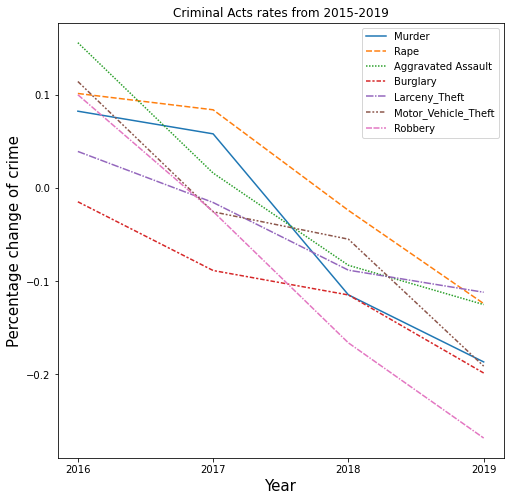

In [20]:
#Total_Crimes_df.pct_change(fill_method ='ffill').plot.line(figsize = (8,8))
plt.figure(figsize = (8,8))
sns.lineplot(data=Total_Crimes_df.pct_change(fill_method ='ffill'))
plt.title('Criminal Acts rates from 2015-2019')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Percentage change of crime', fontsize = 15)
plt.show()

Here we can see the trend of Crime rates over the year. While they all decrease with Murder, we can see some crime trends that are very similar to the Murder trend. We can see that Robbery, Motor Vehicle Theft, Total Larceny Theft, and Aggravated Assult have similar trends. Lets see if we can calculate the correlation between those crimes and murders so we can focus on one to analyze. 

In [21]:
print("Total Aggravated Assault and Murder correlation")
print(Total_Crimes_df['Murder'].corr(Total_Crimes_df['Aggravated Assault']))
print("Total Larceny Theft and Murder correlation")
print(Total_Crimes_df['Murder'].corr(Total_Crimes_df['Larceny_Theft']))
print("Total Motor Vehicle Theft and Murder correlation")
print(Total_Crimes_df['Murder'].corr(Total_Crimes_df['Motor_Vehicle_Theft']))
print("Total Robbery and Murder correlation")
print(Total_Crimes_df['Murder'].corr(Total_Crimes_df['Robbery']))

Total Aggravated Assault and Murder correlation
0.9343379379924214
Total Larceny Theft and Murder correlation
0.9159777784759447
Total Motor Vehicle Theft and Murder correlation
0.9590348567941476
Total Robbery and Murder correlation
0.9381802146494735


Suprisingly enough, we see that a non-violent crime (Total Motor Vehicle theft) has the largest correlation with Murder. Now lets test this with linear regression to see how accurate this relationship is with our city data (for the sake of brevity, the charts have been excluded with the results shown in the next section labelled EDA P-Value Histogram.)

In [22]:
Row_name = [2015, 2016, 2017, 2018, 2019]
P_Value_Motor_Vehicle = []
P_Value_Larceny_Theft = []
P_Value_Robbery = []
P_Value_Aggravated_Assault = []

In [23]:
citycombine = citycombine.rename(columns={'Murders 2015': "M",'Motor_Vehicle_Theft 2015':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2015",'MV':'Motor_Vehicle_Theft 2015'})

In [24]:
p_value_Murders_Motor_Vehicle_Theft_2015 = res.pvalues[0]
#print("P value between Murders 2015 Motor_Vehicle_Theft 2015 is ")
p_value_Murders_Motor_Vehicle_Theft_2015
P_Value_Motor_Vehicle.append(1-p_value_Murders_Motor_Vehicle_Theft_2015)

In [25]:
citycombine = citycombine.rename(columns={'Murders 2016': "M",'Motor_Vehicle_Theft 2016':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2016",'MV':'Motor_Vehicle_Theft 2016'})

In [26]:
p_value_Murders_Motor_Vehicle_Theft_2016 = res.pvalues[0]
print("P value between Murders 2016 Motor_Vehicle_Theft 2016 is ")
p_value_Murders_Motor_Vehicle_Theft_2016
P_Value_Motor_Vehicle.append(1-p_value_Murders_Motor_Vehicle_Theft_2016)

P value between Murders 2016 Motor_Vehicle_Theft 2016 is 


In [27]:
citycombine = citycombine.rename(columns={'Murders 2017': "M",'Motor_Vehicle_Theft 2017':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2017",'MV':'Motor_Vehicle_Theft 2017'})

In [28]:
p_value_Murders_Motor_Vehicle_Theft_2017 = res.pvalues[0]
print("P value between Murders 2017 Motor_Vehicle_Theft 2017 is ")
P_Value_Motor_Vehicle.append(1-res.pvalues[0])

P value between Murders 2017 Motor_Vehicle_Theft 2017 is 


In [29]:
citycombine = citycombine.rename(columns={'Murders 2018': "M",'Motor_Vehicle_Theft 2018':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2018",'MV':'Motor_Vehicle_Theft 2018'})

In [30]:
p_value_Murders_Motor_Vehicle_Theft_2018 = res.pvalues[0]
print("P value between Murders 2018 Motor_Vehicle_Theft 2018 is ")
p_value_Murders_Motor_Vehicle_Theft_2018
P_Value_Motor_Vehicle.append(1-res.pvalues[0])

P value between Murders 2018 Motor_Vehicle_Theft 2018 is 


In [31]:
citycombine = citycombine.rename(columns={'Murders 2019': "M",'Motor_Vehicle_Theft 2019':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2019",'MV':'Motor_Vehicle_Theft 2019'})

In [32]:
p_value_Murders_Motor_Vehicle_Theft_2019 = res.pvalues[0]
print("P value between Murders 2019 Motor_Vehicle_Theft 2019 is ")
p_value_Murders_Motor_Vehicle_Theft_2019
P_Value_Motor_Vehicle.append(1-res.pvalues[0])

P value between Murders 2019 Motor_Vehicle_Theft 2019 is 


In [33]:

citycombine = citycombine.rename(columns={'Murders 2015': "M",'Robbery 2015':'MV'})
outcome_1, predictors_1 = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
# print(res_1.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2015",'MV':'Robbery 2015'})

In [34]:
p_value_Murders_Robbery_2015 = res.pvalues[0]
#print("P value between Murders 2015 Robbery 2015 is ")
P_Value_Robbery.append(1-res.pvalues[0])

In [35]:
citycombine = citycombine.rename(columns={'Murders 2016': "M",'Robbery 2016':'MV'})
outcome_1, predictors_1 = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
# print(res_1.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2016",'MV':'Robbery 2016'})

In [36]:
p_value_Murders_Robbery_2016 = res.pvalues[0]
#print("P value between Murders 2016 Robbery 2016 is ")
p_value_Murders_Robbery_2016
P_Value_Robbery.append(1-res.pvalues[0])

In [37]:
citycombine = citycombine.rename(columns={'Murders 2017': "M",'Robbery 2017':'MV'})
outcome_1, predictors_1 = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
# print(res_1.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2017",'MV':'Robbery 2017'})

In [38]:
p_value_Murders_Robbery_2017 = res.pvalues[0]
#print("P value between Murders 2017 Robbery 2017 is ")
p_value_Murders_Robbery_2017
P_Value_Robbery.append(1-res.pvalues[0])

In [39]:
citycombine = citycombine.rename(columns={'Murders 2018': "M",'Robbery 2018':'MV'})
outcome_1, predictors_1 = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
# print(res_1.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2018",'MV':'Robbery 2018'})

In [40]:
p_value_Murders_Robbery_2018 = res.pvalues[0]
#print("P value between Murders 2018 Robbery 2018 is ")
p_value_Murders_Robbery_2018
P_Value_Robbery.append(1-res.pvalues[0])

In [41]:
citycombine = citycombine.rename(columns={'Murders 2019': "M",'Robbery 2019':'MV'})
outcome_1, predictors_1 = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
# print(res_1.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2019",'MV':'Robbery 2019'})

In [42]:
p_value_Murders_Robbery_2019 = res.pvalues[0]
#print("P value between Murders 2019 Robbery 2019 is ")
p_value_Murders_Robbery_2019
P_Value_Robbery.append(1-res.pvalues[0])

In [43]:
citycombine = citycombine.rename(columns={'Murders 2015': "M",'Aggravated_Assault 2015':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2015",'MV':'Aggravated_Assault 2015'})

In [44]:
p_value_Murders_Aggravated_Assault_2015 = res.pvalues[0]
#print("P value between Murders 2015 Aggravated_Assault 2015 is ")
p_value_Murders_Aggravated_Assault_2015
P_Value_Aggravated_Assault.append(1-res.pvalues[0])

In [45]:
citycombine = citycombine.rename(columns={'Murders 2016': "M",'Aggravated_Assault 2016':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2016",'MV':'Aggravated_Assault 2016'})

In [46]:
p_value_Murders_Aggravated_Assault_2016 = res.pvalues[0]
#print("P value between Murders 2016 Aggravated_Assault 2016 is ")
p_value_Murders_Aggravated_Assault_2016
P_Value_Aggravated_Assault.append(1-res.pvalues[0])

In [47]:
citycombine = citycombine.rename(columns={'Murders 2017': "M",'Aggravated_Assault 2017':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2017",'MV':'Aggravated_Assault 2017'})

In [48]:
p_value_Murders_Aggravated_Assault_2017 = res.pvalues[0]
#print("P value between Murders 2017 Aggravated_Assault 2017 is ")
p_value_Murders_Aggravated_Assault_2017
P_Value_Aggravated_Assault.append(1-res.pvalues[0])

In [49]:
citycombine = citycombine.rename(columns={'Murders 2018': "M",'Aggravated_Assault 2018':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2018",'MV':'Aggravated_Assault 2018'})

In [50]:
p_value_Murders_Aggravated_Assault_2018 = res.pvalues[0]
#print("P value between Murders 2018 Aggravated_Assault 2018 is ")
p_value_Murders_Aggravated_Assault_2018
P_Value_Aggravated_Assault.append(1-res.pvalues[0])

In [51]:
citycombine = citycombine.rename(columns={'Murders 2019': "M",'Aggravated_Assault 2019':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2019",'MV':'Aggravated_Assault 2019'})

In [52]:
p_value_Murders_Aggravated_Assault_2019 = res.pvalues[0]
#print("P value between Murders 2019 Aggravated_Assault 2019 is ")
p_value_Murders_Aggravated_Assault_2019
P_Value_Aggravated_Assault.append(1-res.pvalues[0])


In [53]:
citycombine = citycombine.rename(columns={'Murders 2015': "M",'Larceny_Theft 2015':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2015",'MV':'Larceny_Theft 2015'})

In [54]:
p_value_Murders_Larceny_Theft_2015 = res.pvalues[0]
#print("P value between Murders 2015 Larceny_Theft 2015 is ")
p_value_Murders_Larceny_Theft_2015
P_Value_Larceny_Theft.append(1-res.pvalues[0])

In [55]:
citycombine = citycombine.rename(columns={'Murders 2016': "M",'Larceny_Theft 2016':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2016",'MV':'Larceny_Theft 2016'})

In [56]:
p_value_Murders_Larceny_Theft_2016 = res.pvalues[0]
#print("P value between Murders 2016 Larceny_Theft 2016 is ")
p_value_Murders_Larceny_Theft_2016
P_Value_Larceny_Theft.append(1-res.pvalues[0])

In [57]:
citycombine = citycombine.rename(columns={'Murders 2017': "M",'Larceny_Theft 2017':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2017",'MV':'Larceny_Theft 2017'})

In [58]:
p_value_Murders_Larceny_Theft_2017 = res.pvalues[0]
#print("P value between Murders 2017 Larceny_Theft 2017 is ")
p_value_Murders_Larceny_Theft_2017
P_Value_Larceny_Theft.append(1-res.pvalues[0])

In [59]:
citycombine = citycombine.rename(columns={'Murders 2018': "M",'Larceny_Theft 2018':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2018",'MV':'Larceny_Theft 2018'})

In [60]:
p_value_Murders_Larceny_Theft_2018 = res.pvalues[0]
#print("P value between Murders 2018 Larceny_Theft 2018 is ")
p_value_Murders_Larceny_Theft_2018
P_Value_Larceny_Theft.append(1-res.pvalues[0])

In [61]:
citycombine = citycombine.rename(columns={'Murders 2019': "M",'Larceny_Theft 2019':'MV'})
outcome, predictors = patsy.dmatrices('M ~ MV', citycombine)
#mod = smf.ols(formula = 'MV ~ M', data=citycombine)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
# print(res.summary())
citycombine = citycombine.rename(columns={'M': "Murders 2019",'MV':'Larceny_Theft 2019'})

In [62]:
p_value_Murders_Larceny_Theft_2019 = res.pvalues[0]
#print("P value between Murders 2019 Larceny_Theft 2019 is ")
p_value_Murders_Larceny_Theft_2019
P_Value_Larceny_Theft.append(1-res.pvalues[0])

# EDA P-Value Histogram

We want to visualize all the p-values in a histogram to see which crimes had a p-value significance .95 to 1, which indicates it had a signifcant impact on murder rates. 

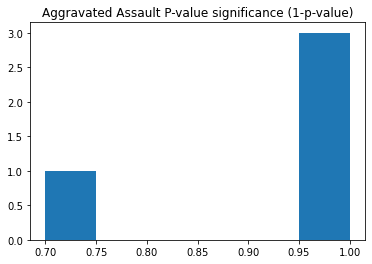

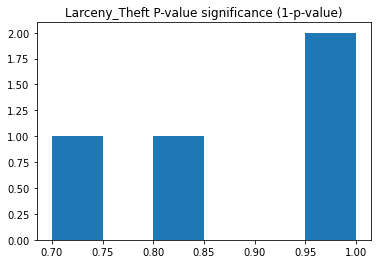

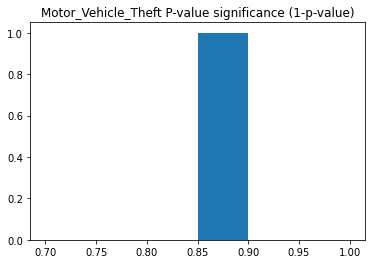

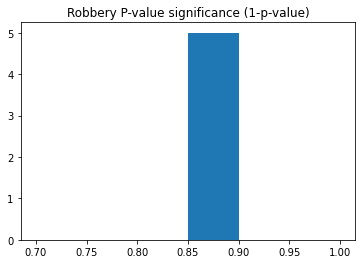

In [63]:
P_Value_df = pd.DataFrame({
                                'Aggravated Assault' : P_Value_Aggravated_Assault,
                                'Larceny_Theft' : P_Value_Larceny_Theft,
                                'Motor_Vehicle_Theft' : P_Value_Motor_Vehicle,
                                'Robbery':P_Value_Robbery},
                                index=['2015','2016','2017','2018','2019'])



#P_Value_df.hist(bins=20,figsize=(6,6))
plt.hist(P_Value_df['Aggravated Assault'],range=[.7,1],bins=6)

plt.title('Aggravated Assault P-value significance (1-p-value)')

plt.show()

plt.hist(P_Value_df['Larceny_Theft'],range=[.7,1],bins=6)

plt.title('Larceny_Theft P-value significance (1-p-value)')


plt.show()

plt.hist(P_Value_df['Motor_Vehicle_Theft'],range=[.7,1],bins=6)

plt.title('Motor_Vehicle_Theft P-value significance (1-p-value)')

plt.show()

plt.hist(P_Value_df['Robbery'],range=[.7,1],bins=6)

plt.title('Robbery P-value significance (1-p-value)')


plt.show()

Although we had a very high correlation with Motor Vehile Theft and Murder rates for their totals, the P values from these test result in Motor Vehicle Thefts show that they do not have a huge affect on Murder Rates. We see from the histograms that only Larceny Theft and Aggravated Assault had a p-value of .05 or less. Aggravated Assault had 3 years the p-value showed it had an affect on Murder rates, while Larcney Theft only had 2 years. 

# Ethics & Privacy

Our data was all sourced from the FBI through its Uniform Crime Reporting (UCR) program. This data is all publicly available data with no personal identifiers, and thus there are minimal privacy concerns from our data.
 One potential limitation with the data is that all the data that the FBI receives for the UCR program is voluntarily sourced from participating agencies, and thus the data may be subject to potential biases from what was chosen to be reported. Although the data does go through certain checks outlined by the FBI (as seen here: https://ucr.fbi.gov/data-quality-guidelines-new), it is still subject to errors caused by data from areas that aren't fully reported. However, this is also likely fairly minimal and not enough to cause our results to be invalid.

# Conclusion & Discussion

At the beginning of our project, we assumed that murder cases should have a higher correlation with violent crimes such as rape, robbery, and aggravated assault compared to property crimes like larceny theft, motor vehicle theft, and burglary. 
To begin our analysis, we first used line and bar charts to determine which crimes rates were closest to each other year by year. From there, we chose the closest ones to conduct ordinary least squares regression tests on. This allowed us to determine which ones were most significant by calculating the p-values of all of these crimes we focused on. After calculating all the p-values of the crimes of interest, we found that aggravated assault had the highest correlation to murder cases, however to our suprise, larceny theft had the second highest correlation with murder. Aggravated assault made the most sense to be connected with murder cases since it is inherently a violent crime and involves inflicting harm on someone. Larceny theft however does not directly involve injuring another individual, so it came as a suprise when it was found to be highly correlated to murder cases compared to the other crimes in cities. 

We have viewed other crimes as well such as robbery and motor vehicle theft, but our OLS regression results show us that they have no meaningful connection towards murder cases changes as shown by their p-values. 



# Team Contributions

- Issac Navarro - Data Cleaning, EDA, Conclusion & Discussion
- Kelly Nham - Overview, Hypothesis, Datasets, EDA
- Aryan Safari - Data Cleaning, EDA, Conclusion & Discussion
- Albert Zhong - Background and Prior Work, Data Cleaning, EDA, Ethics & Privacy, Conclusion & Discussion

In [ ]:
#Thank you for the wonderful quarter and have a great summer break! :)